In [12]:
! pip install mediapy scikit-learn

In [13]:
# –∏–º–ø–æ—Ä—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π
import cv2
import mediapy
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ matplotlib
%config InlineBackend.figure_format = "retina"
plt.style.use("seaborn-v0_8-notebook")

# –ø—É—Ç—å –∫ –¥–∞–Ω–Ω—ã–º
DATA_DIR = Path("./06")

---
### **–°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π**

<img src="./06/fig1.jpg" width=400/>
<img src="./06/fig2.jpg" width=400/>

**–°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π** ‚Äì –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –ø–∏–∫—Å–µ–ª–µ–π –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º.

–í –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–≥—É—Ç –±—ã—Ç—å:

- —Ü–≤–µ—Ç–æ–≤—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –ø–∏–∫—Å–µ–ª–µ–π –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ RGB, HSV –∏ —Ç.–¥.

- –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –ø–∏–∫—Å–µ–ª–µ–π (x, y)

- –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π

- –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –æ–±—ä–µ–∫—Ç–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —á–µ–ª–æ–≤–µ–∫, –º–∞—à–∏–Ω–∞, –¥–æ—Ä–æ–≥–∞ –∏ —Ç.–¥.)

---
### **–ü—Ä–∏–º–µ—Ä—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π**

<img src="./06/road_seg.jpg" height=200/>
<img src="./06/med_seg.jpg" height=200/>
<img src="./06/sat_segm.jpg" height=200/>

C–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –æ–±–ª–∞—Å—Ç—è—Ö:

- –∞–≤—Ç–æ–Ω–æ–º–Ω–æ–µ –≤–æ–∂–¥–µ–Ω–∏–µ

- –º–µ–¥–∏—Ü–∏–Ω—Å–∫–∞—è –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞

- –∞–Ω–∞–ª–∏–∑ —Å–ø—É—Ç–Ω–∏–∫–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π


---
### **–°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø–∏–∫—Å–µ–ª–µ–π**

<img src="./06/segm_types.jpg" width=900/>

–ö–∞–∂–¥–æ–º—É –ø–∏–∫—Å–µ–ª—é –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç—Å—è –º–µ—Ç–∫–∞ –∫–ª–∞—Å—Å–∞.

- —Ç—Ä–µ–±—É–µ—Ç—Å—è –æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å —Ä–∞–∑–º–µ—Ç–∫–æ–π

- –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª—é–±—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ (SVM, Random Forest, –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏ –∏ —Ç.–¥.)

- –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –ø—Ä–∏ –Ω–∞–ª–∏—á–∏–∏ —Ö–æ—Ä–æ—à–µ–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏

–í–∏–¥—ã —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø–∏–∫—Å–µ–ª–µ–π:

- **semantic segmentation** - –∫–∞–∂–¥–æ–º—É –ø–∏–∫—Å–µ–ª—é –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç—Å—è –º–µ—Ç–∫–∞ –∫–ª–∞—Å—Å–∞

- **instance segmentation** - –Ω–µ —Ç–æ–ª—å–∫–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø–∏–∫—Å–µ–ª–∏ –ø–æ –∫–ª–∞—Å—Å—É, –Ω–æ –∏ –æ—Ç–ª–∏—á–∞—Ç—å –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —ç–∫–∑–µ–º–ø–ª—è—Ä—ã –æ–±—ä–µ–∫—Ç–æ–≤ –æ–¥–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞

- **panoptic segmentation** - –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç semantic –∏ instance —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é

*–î–µ–º–∫–∞ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ —Å –ø–æ–º–æ—â—å—é SAM2 (Segment Anything 2, 11M images, 1B+ masks)*

https://sam2.metademolab.com/demo

---
### **–ü–æ—Ä–æ–≥–æ–≤–∞—è c–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è**

<figure>
    <img src="./06/thresh_segm.jpg" style="width:70%"/>
</figure>

–ê–ª–≥–æ—Ä–∏—Ç–º –±–∏–Ω–∞—Ä–Ω–æ–π –ø–æ—Ä–æ–≥–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏:

- –Ω–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ –≤—ã–±—Ä–∞—Ç—å –ø–æ—Ä–æ–≥ $T$
- —Å–µ–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ $f$ –ø–æ –ø–æ—Ä–æ–≥—É $T$
$$
    g(x, y) =
    \begin{cases}
        0\,, & f(x,y) \leqslant T \\        
        255\,, & f(x,y) > T
    \end{cases}
$$

---
##### **–ü—Ä–∏–º–µ—Ä –ø–æ—Ä–æ–≥–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏**

–ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —è—Ä–∫–æ—Å—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.

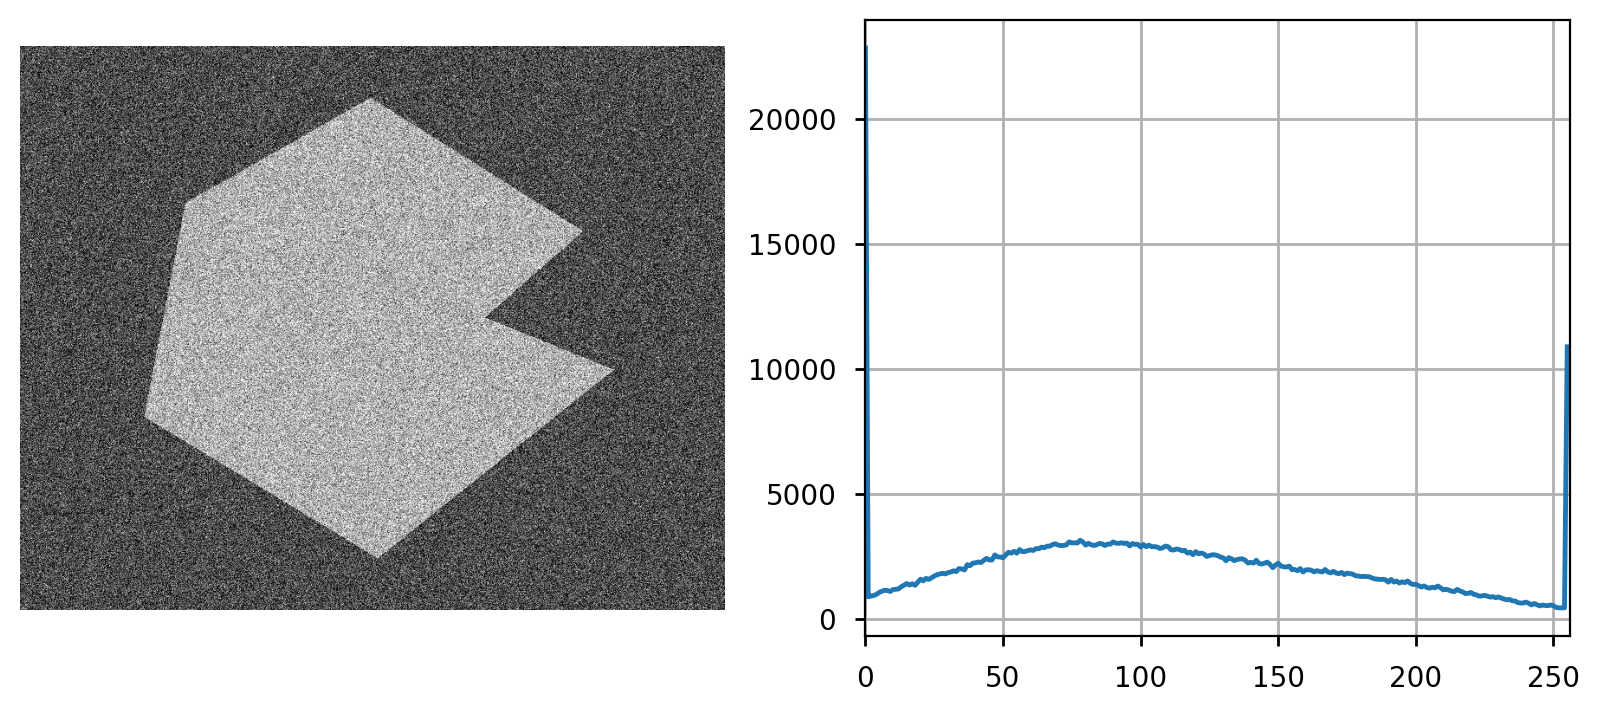

In [14]:
# —á–∏—Ç–∞–µ–º grayscale –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
src_image = cv2.imread(DATA_DIR / "gaussian_noise.png", cv2.IMREAD_GRAYSCALE)

# –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
hist = cv2.calcHist([src_image], [0], None, [256], [0, 256])

# –≥—Ä–∞—Ñ–∏–∫–∏
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.axis("off")
plt.imshow(src_image, cmap="gray")
plt.subplot(122)
plt.plot(hist)
plt.xlim([0, 256])
plt.grid(True)

–ü–µ—Ä–µ–¥ –≤—ã–±–æ—Ä–æ–º –ø–æ—Ä–æ–≥–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –Ω—É–∂–Ω–æ —Å–≥–ª–∞–¥–∏—Ç—å, —á—Ç–æ–±—ã —É–º–µ–Ω—å—à–∏—Ç—å —à—É–º.

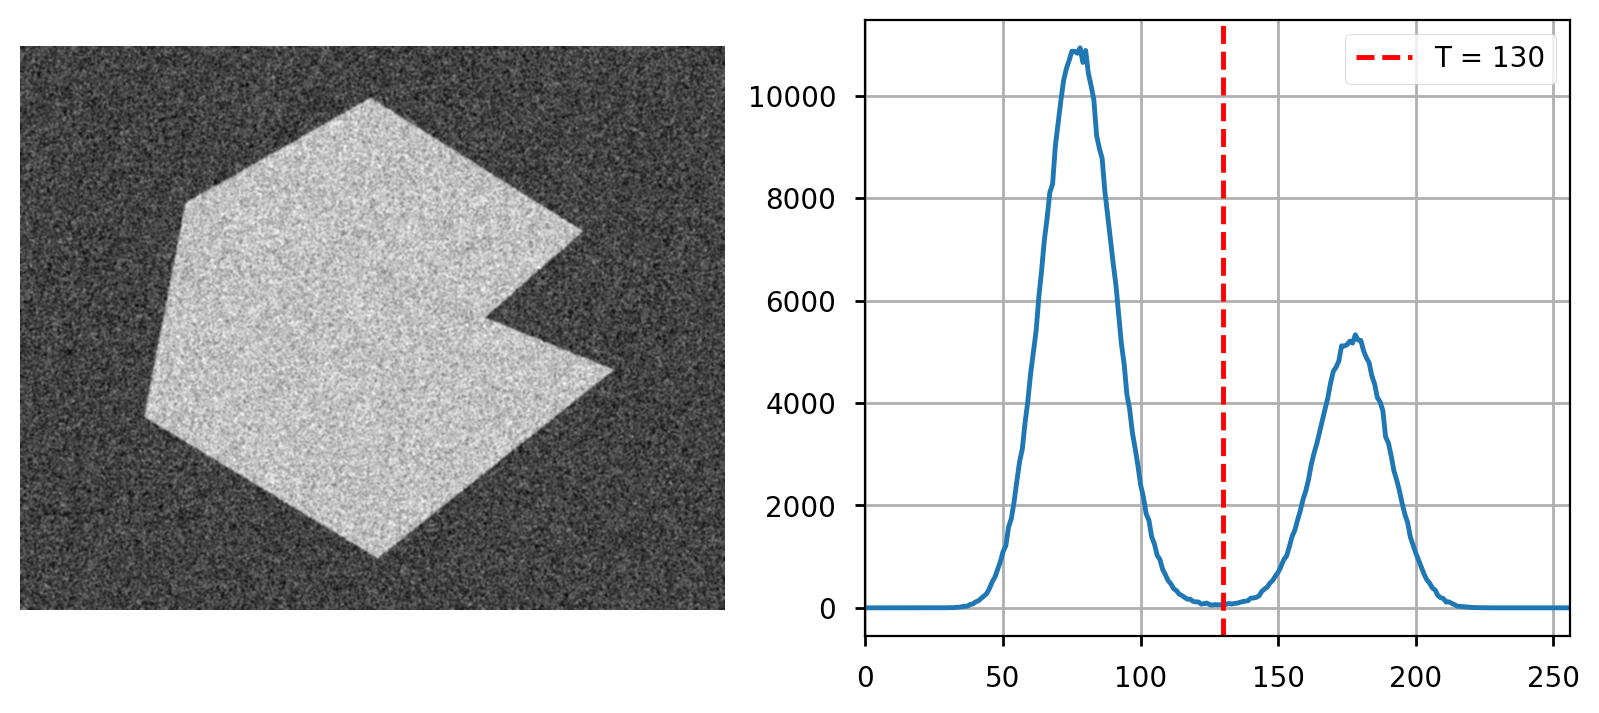

In [15]:
# –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ 5 x 5
blur_image = cv2.GaussianBlur(src_image, (5, 5), sigmaX=0)

# –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
hist = cv2.calcHist([blur_image], [0], None, [256], [0, 256])

# –ø–æ—Ä–æ–≥ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
T = 130

# –≥—Ä–∞—Ñ–∏–∫–∏
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.axis("off")
plt.imshow(blur_image, cmap="gray")
plt.subplot(122)
plt.plot(hist)
plt.axvline(x=T, color="r", linestyle="--", label=f"T = {T}")
plt.xlim([0, 256])
plt.legend()
plt.grid(True)

–í—ã–ø–æ–ª–Ω–∏–º –ø–æ—Ä–æ–≥–æ–≤—É—é —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é —Å –≤—ã–±—Ä–∞–Ω–Ω—ã–º –ø–æ—Ä–æ–≥–æ–º.


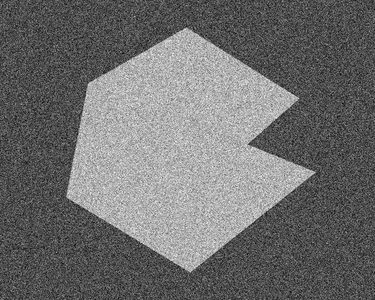
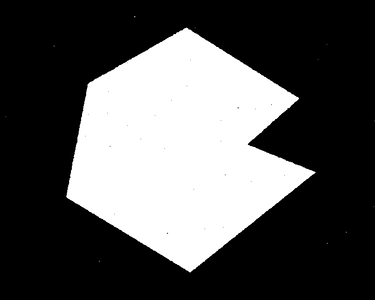

In [16]:
# –ø–æ—Ä–æ–≥–æ–≤–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è
T = 130
mask = np.uint8(255 * (blur_image > T))

# –≥—Ä–∞—Ñ–∏–∫–∏
mediapy.show_images({
    "–∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ": src_image, 
    f"—Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –ø–æ –ø–æ—Ä–æ–≥—É T = {T}": mask
}, border=True, height=300)

---
### **–ú–µ—Ç–æ–¥ –û—Ü—É –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –ø–æ—Ä–æ–≥–∞ –±–∏–Ω–∞—Ä–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏**

<figure>
    <img src="./06/thresh_segm.jpg" style="width:70%"/>
</figure>

–ö–∞–∫ –≤—ã–±—Ä–∞—Ç—å –ø–æ—Ä–æ–≥ $T$ –∞–ª–≥–æ—Ä–∏—Ç–º–∏—á–µ—Å–∫–∏?

–ê–ª–≥–æ—Ä–∏—Ç–º –û—Ü—É:

- –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ—Ä–æ–≥–∞ $T=1,2,\ldots,255$, —Ä–∞–∑–æ–±—å–µ–º –≤—Å–µ –ø–∏–∫—Å–µ–ª–∏ –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞
$$
    C_1 = \left\{(x,y): f(x,y) < T\right\}\,,\quad
    C_2 = \left\{(x,y): f(x,y) \geqslant T\right\}
$$

-  –≤—ã–±–µ—Ä–µ–º –ø–æ—Ä–æ–≥ —Ç–∞–∫, —á—Ç–æ –±—ã –¥–∏—Å–ø–µ—Ä—Å–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –ø–∏–∫—Å–µ–ª–µ–π –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ –±—ã–ª–∞ –º–∏–Ω–∏–º–∞–ª—å–Ω–∞
    $$
        T_\ast=\argmin_{0 < T < 256} 
        \left[\sigma_1^2(T)  + \sigma_2^2(T)\right]
    $$
    –≥–¥–µ $\sigma_1^2, \sigma_2^2$ - –¥–∏—Å–ø–µ—Ä—Å–∏–∏ —è—Ä–∫–æ—Å—Ç–µ–π –ø–∏–∫—Å–µ–ª–µ–π –≤ –∫–ª–∞—Å—Å–∞—Ö $C_1$ –∏ $C_2$.

---
##### **–ü—Ä–∏–º–µ—Ä –ø–æ—Ä–æ–≥–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –û—Ü—É**

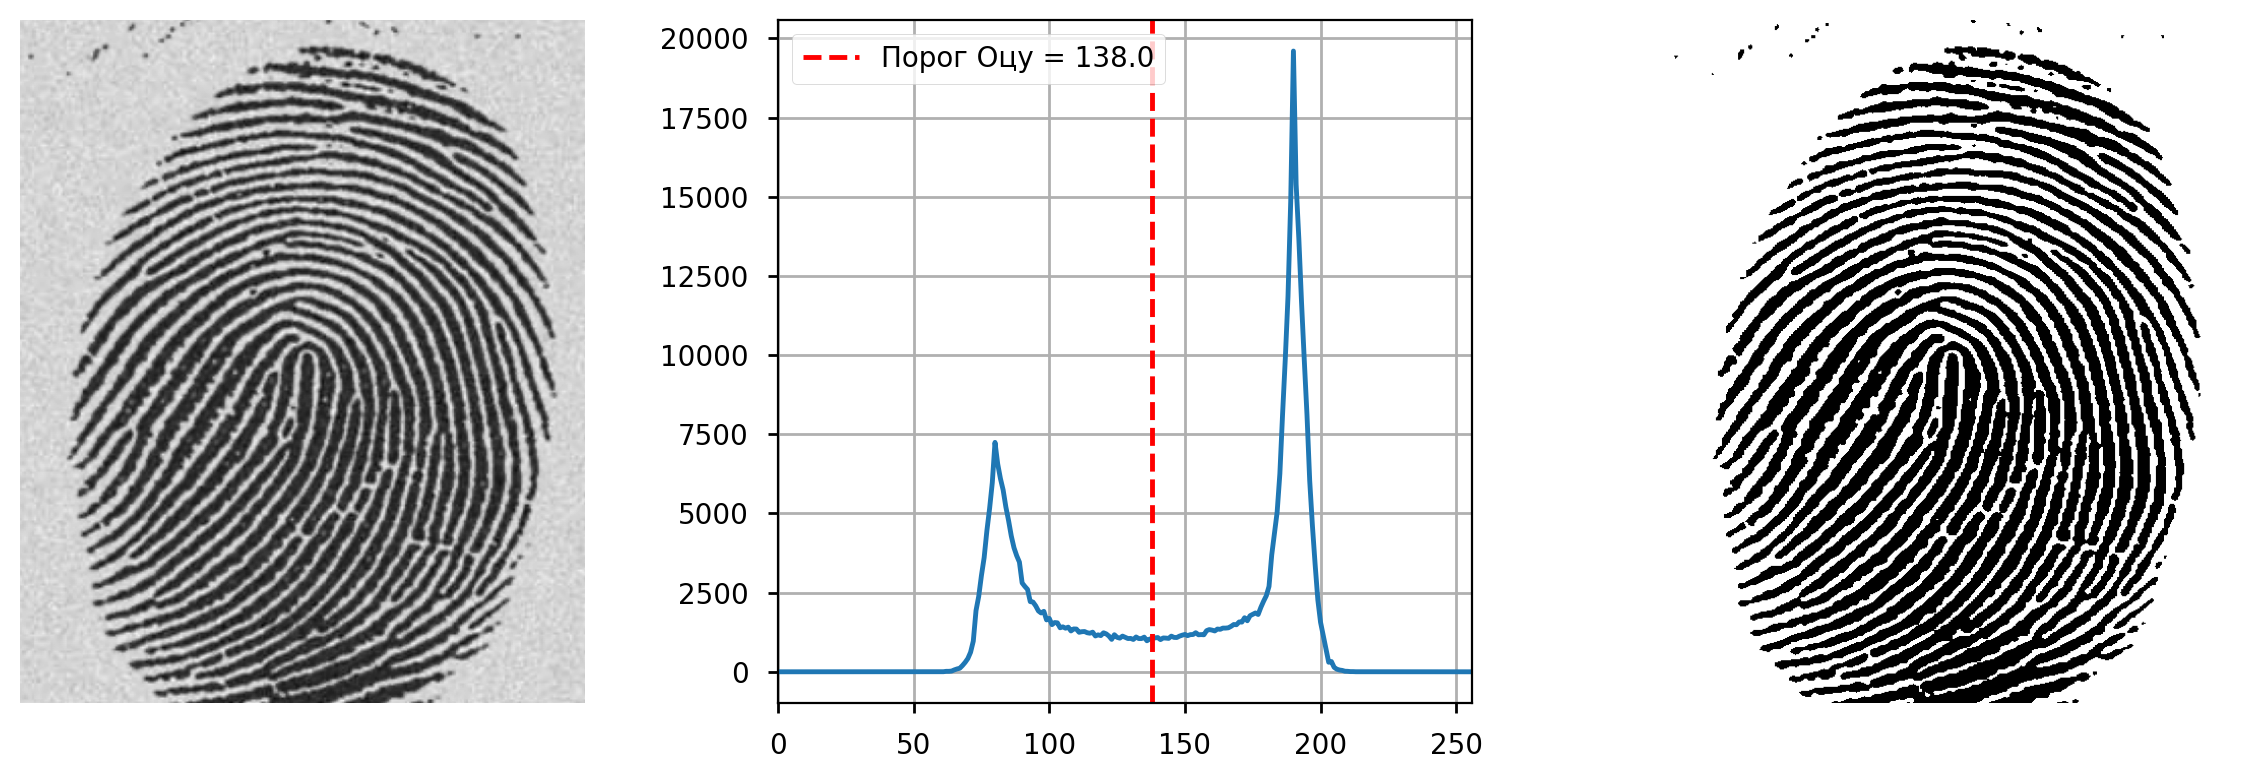

In [17]:
# —á–∏—Ç–∞–µ–º grayscale –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
image = cv2.imread(DATA_DIR / "fingerprint.png", cv2.IMREAD_GRAYSCALE)

# –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞ –º–µ—Ç–æ–¥–æ–º –û—Ü—É –∏ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
T, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# –≤—ã—á–∏—Å–ª–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# –≥—Ä–∞—Ñ–∏–∫–∏
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.axis("off")
plt.imshow(image, cmap="gray")
plt.subplot(132)
plt.plot(hist)
plt.axvline(x=T, color="r", linestyle="--", label=f"–ü–æ—Ä–æ–≥ –û—Ü—É = {T}")
plt.xlim([0, 256])
plt.legend()
plt.grid(True)
plt.subplot(133)
plt.axis("off")
plt.imshow(mask, cmap="gray")
plt.tight_layout()


---
### **–°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–∏–∫—Å–µ–ª–µ–π**

<figure>
    <img src="./06/peppers.jpg" style="width:40%"/>
    <img src="./06/meanshift15.jpg" style="width:40%"/>
</figure>

–ü–∏–∫—Å–µ–ª–∏ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏.

–ö–ª–∞—Å—Ç–µ—Ä–∏–∑—É—è –ø–∏–∫—Å–µ–ª–∏ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º, –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é.

–í –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–≥—É—Ç –±—ã—Ç—å:

- —Ü–≤–µ—Ç–æ–≤—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –ø–∏–∫—Å–µ–ª–µ–π –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ RGB, HSV, YCrCb –∏ —Ç.–¥.

- –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –ø–∏–∫—Å–µ–ª–µ–π (x, y)

- –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π


---
### **3-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Ç–æ—á–µ–∫ –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏**

<figure>
    <img src="./06/3means.jpg" style="width:90%"/>
</figure>

**–ó–∞–¥–∞—á–∞:** —Ä–∞–∑–±–∏—Ç—å —Ç–æ—á–∫–∏ –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏ –Ω–∞ 3 –∫–ª–∞—Å—Ç–µ—Ä–∞.

**–†–µ—à–µ–Ω–∏–µ:**

1. –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å 3 —Ü–µ–Ω—Ç—Ä–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (—Å–ª—É—á–∞–π–Ω–æ –∏–ª–∏ –ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–º—É –ø—Ä–∞–≤–∏–ª—É)

2. —Å–æ–∑–¥–∞—Ç—å –∫–ª–∞—Å—Ç–µ—Ä—ã, –æ—Ç–Ω–µ—Å—è –∫–∞–∂–¥—É—é —Ç–æ—á–∫—É –∫ –±–ª–∏–∂–∞–π—à–µ–º—É —Ü–µ–Ω—Ç—Ä—É

3. –ø–µ—Ä–µ—Å—á–∏—Ç–∞—Ç—å —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∫–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–æ—á–µ–∫ –≤ –∫–ª–∞—Å—Ç–µ—Ä–µ

4. –ø–æ–≤—Ç–æ—Ä—è—Ç—å —à–∞–≥–∏ 2-3, –ø–æ–∫–∞ —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–µ –ø–µ—Ä–µ—Å—Ç–∞–Ω—É—Ç –º–µ–Ω—è—Ç—å—Å—è

---
### **k-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è**

**–ó–∞–¥–∞–Ω—ã:** $N$ —Ç–æ—á–µ–∫ –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ $\mathbf{z}_n\in\mathbf{R}^d$ –∏ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ $k$

**–ó–∞–¥–∞—á–∞:** –Ω–∞–π—Ç–∏ $k$ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

**k-means –∞–ª–≥–æ—Ä–∏—Ç–º**

1. –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å $k$ —Ü–µ–Ω—Ç—Ä–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ $\mathbf{m}_1,\ldots,\mathbf{m}_k\in\mathbf{R}^d$

2. –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ $\mathbf{z}_n$ –Ω–∞–π—Ç–∏ –±–ª–∏–∂–∞–π—à–∏–π —Ü–µ–Ω—Ç—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ $\mathbf{m}_i$ –∏ –æ—Ç–Ω–µ—Å—Ç–∏ —Ç–æ—á–∫—É –∫  –∫–ª–∞—Å—Ç–µ—Ä—É $C_i$

$$
    \mathbf{z}_n \in C_i \quad \text{–µ—Å–ª–∏} \quad \|\mathbf{z}_n - \mathbf{m}_i\| < \|\mathbf{z}_n - \mathbf{m}_j\|, \quad j \neq i
$$

3. –ø–µ—Ä–µ—Å—á–∏—Ç–∞—Ç—å —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∫–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–æ—á–µ–∫ –≤ –∫–ª–∞—Å—Ç–µ—Ä–µ
$$
    \mathbf{m}_i = \frac{1}{|C_i|} \sum_{\mathbf{z}_n \in C_i} \mathbf{z}_n
$$

4. –ø–æ–≤—Ç–æ—Ä—è—Ç—å —à–∞–≥–∏ 2-3 –ø–æ–∫–∞ –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤–æ –≤—Å–µ—Ö —Ü–µ–Ω—Ç—Ä–∞—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–µ —Å—Ç–∞–Ω—É—Ç –º–µ–Ω—å—à–µ $\varepsilon$

**–°–≤–æ–π—Å—Ç–≤–∞ k-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏**

- –ø—Ä–æ—Å—Ç–æ–π –∏ –±—ã—Å—Ç—Ä—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º
- —Ç—Ä–µ–±—É–µ—Ç –∑–∞–¥–∞–Ω–∏—è —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ ùëò
- —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ –≤—ã–±–æ—Ä—É –Ω–∞—á–∞–ª—å–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
- —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ –≤—ã–±—Ä–æ—Å–∞–º

---
##### **–ü—Ä–∏–º–µ—Ä: k-means —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è**


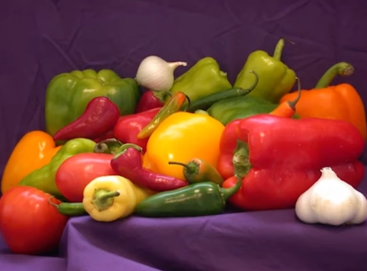

In [18]:
# —á–∏—Ç–∞–µ–º RGB –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
image = cv2.imread(DATA_DIR / "peppers.jpg", cv2.IMREAD_COLOR_RGB)
image = cv2.resize(image, fx=0.5, fy=0.5, dsize=None)

# –≥—Ä–∞—Ñ–∏–∫–∏
mediapy.show_images({
    "–∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ": image,
}, border=True, height=350)

In [19]:
# –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ –Ω–∞–±–æ—Ä —Ç–æ—á–µ–∫ (num_points, 3) - (R, G, B) —Ü–≤–µ—Ç–∞
z = image.reshape(-1, 3) 
num_points = z.shape[0]

# –≥—Ä–∞—Ñ–∏–∫–∏ —Ü–≤–µ—Ç–æ–≤ –ø–∏–∫—Å–µ–ª–µ–π –≤ 3D
import plotly.express as px
import plotly.graph_objects as go

plots = []

# —Ç–æ—á–∫–∏ –ø—Ä–∑–Ω–∞–∫–æ–≤ (—Ü–≤–µ—Ç–æ–≤ –ø–∏–∫—Å–µ–ª–µ–π)
p = px.scatter_3d(
    x=z[:, 0], y=z[:, 1], z=z[:, 2],
    color=num_points * ["gray"],
    color_discrete_map="identity"
)
p.update_traces(marker_size=1)
plots.append(p)

# –æ—Å–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç
p = px.line_3d(x=[0, 255], y=[0, 0], z=[0, 0])
p.update_traces(line=dict(color="red", width=7))
plots.append(p)

p = px.line_3d(x=[0, 0], y=[0, 255], z=[0, 0])
p.update_traces(line=dict(color="green", width=7))
plots.append(p)

p = px.line_3d(x=[0, 0], y=[0, 0], z=[0, 255])
p.update_traces(line=dict(color="blue", width=7))
plots.append(p)

# —Ä–µ–Ω–¥–µ—Ä–∏–Ω–≥ —Å—Ü–µ–Ω—ã
data = []

for p in plots:
    data += p.data

fig = go.Figure(data)

fig.update_layout(autosize=True, width=800, height=600, paper_bgcolor="white",
    scene=dict(
        aspectmode="data",
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False)
    )
)

view = dict(
    eye=dict(x=1, y=1, z=1),
    center=dict(x=0, y=0, z=0),
    up=dict(x=0, y=0, z=1)
)

fig.update_layout(scene_camera=view)
fig.show()

In [20]:
from sklearn.cluster import KMeans

# –∑–∞–¥–∞–¥–∏–º —á–∏—Å–ª–æ –∫–ª–∞—Å—Å–æ–≤
K = 10

# k-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto") 
kmeans.fit(z)

# –Ω–æ–º–µ—Ä–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏
labels = kmeans.labels_

#  —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
cluster_centers = kmeans.cluster_centers_.astype(int)

plots = []

# –≥—Ä–∞—Ñ–∏–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
for k in range(K):
    mask = (labels == k)
    r = z[mask, 0]
    g = z[mask, 1]
    b = z[mask, 2]
    mean_color = cluster_centers[k]
    num_pts = len(r)
    
    p = px.scatter_3d(
        x=z[mask, 0], y=z[mask, 1], z=z[mask, 2],
        color=num_pts * [f"rgb({mean_color[0]}, {mean_color[1]}, {mean_color[2]})"],
        color_discrete_map="identity"
    )
    p.update_traces(marker_size=1)
    plots.append(p)

# –æ—Å–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç
p = px.line_3d(x=[0, 255], y=[0, 0], z=[0, 0])
p.update_traces(line=dict(color="red", width=7))
plots.append(p)

p = px.line_3d(x=[0, 0], y=[0, 255], z=[0, 0])
p.update_traces(line=dict(color="green", width=7))
plots.append(p)

p = px.line_3d(x=[0, 0], y=[0, 0], z=[0, 255])
p.update_traces(line=dict(color="blue", width=7))
plots.append(p)

# —Ä–µ–Ω–¥–µ—Ä–∏–Ω–≥ —Å—Ü–µ–Ω—ã
data = []

for p in plots:
    data += p.data

fig = go.Figure(data)

fig.update_layout(
    autosize=True, width=800, height=600, paper_bgcolor="white",
    scene=dict(
        aspectmode="data",
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False)
    )
)

view = dict(
    eye=dict(x=1, y=1, z=1),
    center=dict(x=0, y=0, z=0),
    up=dict(x=0, y=0, z=1)
)

fig.update_layout(scene_camera=view)
fig.show()


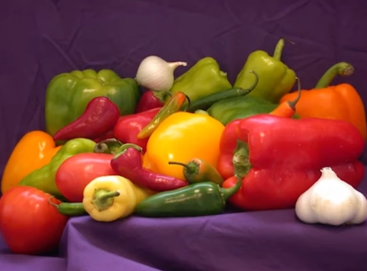
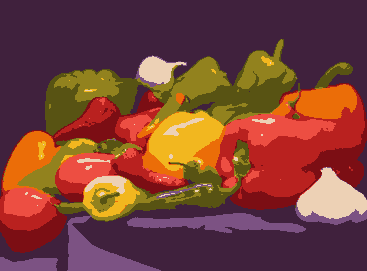

In [21]:
# –≤—ã—á–∏—Å–ª–∏–º –≤—ã—Ö–æ–¥–Ω–æ–µ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
segmented_image = np.zeros_like(image)
h, w = image.shape[:2]

# —Ä–µ—Å–∞–π–∑ –º–∞—Å–∫–∏ –≤ –∏—Å—Ö–æ–¥–Ω—ã–π —Ä–∞–∑–º–µ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
mask = kmeans.labels_.reshape(h, w)

for k in range(K):
    # –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã —Ç–æ—á–µ–∫ –≤ –∫–ª–∞—Å—Ç–µ—Ä–µ
    y, x = np.where(mask == k)
    # –ø–∏–∫—Å–µ–ª–∏ –∫–ª–∞—Å—Ç–µ—Ä–∞
    cluster_pixels = image[y, x]
    # —Å—Ä–µ–¥–Ω–∏–π —Ü–≤–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä–∞
    cluster_color = np.uint8(cluster_pixels.mean(axis=0))
    # –∑–∞–ø–∏—à–µ–º —Å—Ä–µ–¥–Ω–∏–π —Ü–≤–µ—Ç –≤ –≤—ã—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    segmented_image[y, x] = cluster_color

# –≥—Ä–∞—Ñ–∏–∫–∏
mediapy.show_images({
    "–∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ": image,
    "k-means —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è": segmented_image
}, border=True, height=300)

---
### **–í–ª–∏—è–Ω–∏–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ k-means —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é**

<figure>
    <img src="./06/kmeans6.jpg" style="width:40%"/>
    <img src="./06/kmeans7.jpg" style="width:40%"/>
</figure>

- —Å–ª–µ–≤–∞ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –ø–æ —Ü–≤–µ—Ç–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º: 
$$
    \mathbf{z}=(R,G,B)
$$

- —Å–ø—Ä–∞–≤–∞ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –ø–æ —Ü–≤–µ—Ç–æ–≤—ã–º –∏ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º:
$$
    \mathbf{z}=(R,G,B, x, y)
$$


---
### **Mean-shift –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è**

<figure>
    <img src="./06/meanshift1.jpg" style="width:30%"/>
    <img src="./06/meanshift3.jpg" style="width:30%"/>
    <img src="./06/meanshift2.jpg" style="width:30%"/>
</figure>

**–ù–∞ —Ä–∏—Å—É–Ω–∫–µ**:

- –¢–æ—á–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 

- –ü–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

- –ö–ª–∞—Å—Ç–µ—Ä—ã, –Ω–∞–π–¥–µ–Ω–Ω—ã–µ mean-shift –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º

**Mean-shift –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è**:

- –∫–∞–∂–¥—ã–π —Ö–æ–ª–º –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä

- –ø–∏–∫–∏ —Ö–æ–ª–º–æ–≤ - —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

- –∫–∞–∂–¥–∞—è —Ç–æ—á–∫–∞ –≤–∑–±–∏—Ä–∞–µ—Ç—Å—è –ø–æ —Å–∞–º–æ–º—É –∫—Ä—É—Ç–æ–º—É —Ö–æ–ª–º—É 

- —Ç–æ—á–∫–∏, –≤–∑–æ–±—Ä–∞–≤—à–∏–µ—Å—è –Ω–∞ –æ–¥–∏–Ω —Ö–æ–ª–º, –æ–±—Ä–∞–∑—É—é—Ç –∫–ª–∞—Å—Ç–µ—Ä

---
### **Mean-shift: –∫–∞–∫ —Ç–æ—á–∫–∏ –≤–∑–±–∏—Ä–∞—é—Ç—Å—è –Ω–∞ —Ö–æ–ª–º—ã?**

<figure>
    <img src="./06/meanshift4.png" style="width:30%"/>
    <img src="./06/meanshift5.png" style="width:30%"/>
    <img src="./06/meanshift6.png" style="width:30%"/>
</figure>

- –∫–∞–∂–¥–∞—è —Ç–æ—á–∫–∞ $\mathbf{z}_n$ —Å–¥–≤–∏–≥–∞–µ—Ç—Å—è –≤ —Å—Ç–æ—Ä–æ–Ω—É —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —Ç–æ—á–µ–∫ –≤
–æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç–∏ —Ä–∞–¥–∏—É—Å–∞ $R$

<figure>
    <img src="./06/meanshift7.png" style="width:30%"/>
    <img src="./06/meanshift8.png" style="width:30%"/>
    <img src="./06/meanshift9.png" style="width:30%"/>
</figure>

- –∫–∞–∂–¥–∞—è —Ç–æ—á–∫–∞ $\mathbf{z}_n$ —Å–¥–≤–∏–≥–∞–µ—Ç—Å—è –ø–æ–∫–∞ –Ω–µ –ø–µ—Ä–µ—Å—Ç–∞–Ω–µ—Ç –º–µ–Ω—è—Ç—å—Å—è

- —Ç–æ—á–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–π–¥—É—Ç—Å—è –≤ –æ–¥–Ω—É —Ç–æ—á–∫—É, –æ–±—Ä–∞–∑—É—é—Ç –∫–ª–∞—Å—Ç–µ—Ä

---
### **–°–≤–æ–π—Å—Ç–≤–∞ mean-shift –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏**

- –ø—Ä–æ—Å—Ç–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º, –Ω–æ –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ –¥–æ—Ä–æ–≥–æ–π

- –Ω–∞—Ö–æ–¥–∏—Ç —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏

- –Ω–µ —Ç—Ä–µ–±—É–µ—Ç –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ —Ü–µ–Ω—Ç—Ä–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

- –Ω–µ—á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ –≤—ã–±—Ä–æ—Å–∞–º

- –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä–∞–¥–∏—É—Å–∞ –æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç–∏ ùëÖ


---
### **–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ mean-shift –∏ k-means —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏**

<figure>
    <img src="./06/peppers.jpg" style="width:30%"/>
    <img src="./06/meanshift14.png" style="width:30%"/>
    <img src="./06/meanshift15.png" style="width:30%"/>
</figure>

- –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å–ª–µ–≤–∞ - –æ—Ä–∏–≥–∏–Ω–∞–ª

- –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ —Ü–µ–Ω—Ç—Ä–µ - k-means —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è c –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:
$$
    \mathbf{z}=(R,G,B, x, y)\,,\qquad k=16
$$

- –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å–ø—Ä–∞–≤–∞ - mean-shift —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
$$
    \mathbf{z}=(R,G,B, x, y)\,,\qquad R=15
$$

---
##### **–ü—Ä–∏–º–µ—Ä mean-shift —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ OpenCV**


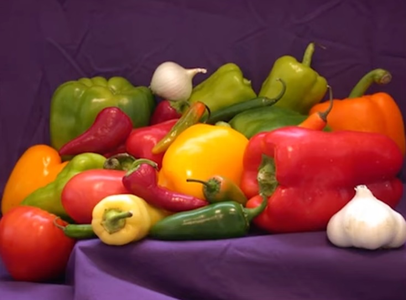
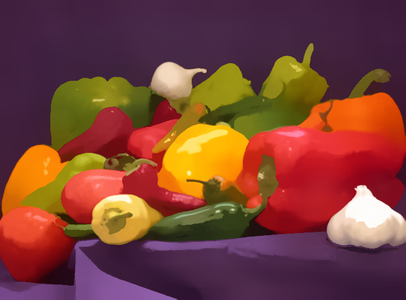

In [22]:
# —á–∏—Ç–∞–µ–º BGR –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
image = cv2.imread(DATA_DIR / "peppers.jpg", cv2.IMREAD_COLOR_BGR)

# OpenCV Mean Shift —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è
segmented_image = cv2.pyrMeanShiftFiltering(
    image, 
    sp=20, # —Ä–∞–¥–∏—É—Å –æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (x, y)
    sr=40, # —Ä–∞–¥–∏—É—Å –æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è —Ü–≤–µ—Ç–æ–≤—ã—Ö –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (R, G, B)
    maxLevel=1 # —á–∏—Å–ª–æ —É—Ä–æ–≤–Ω–µ–π –≤ –ø–∏—Ä–∞–º–∏–¥–µ –ì–∞—É—Å—Å–∞
)

# –≥—Ä–∞—Ñ–∏–∫–∏
mediapy.show_images({
    "–∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ": image[:, :, ::-1], # BGR -> RGB 
    "mean-shift —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è": segmented_image[:, :, ::-1]
}, border=True, height=300)

#### **–î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞ 6**

##### **–¢–µ–æ—Ä–∏—è**

- –í–∏–¥—ã —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ü—Ä–∏–º–µ—Ä—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è.

- –ü–æ—Ä–æ–≥–æ–≤–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ú–µ—Ç–æ–¥ –û—Ü—É –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –ø–æ—Ä–æ–≥–∞.

- –ê–ª–≥–æ—Ä–∏—Ç–º k-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏. –°–≤–æ–π—Å—Ç–≤–∞ k-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏. –°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é k-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏.

- –ê–ª–≥–æ—Ä–∏—Ç–º mean-shift –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏. –°–≤–æ–π—Å—Ç–≤–∞ mean-shift –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏. –°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é mean-shift –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏.

